**Import Pre-processed Dataset**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read Penguins Dataset and print its shape
penguins = pd.read_csv("penguins_preprocessed.csv")
penguins.shape

(344, 10)

In [3]:
# Defining Features and Target

X_data = penguins.drop(columns=['year','gender','calorie requirement','island','average sleep duration'])
print(X_data)
Y_target = penguins['gender']

     species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0        0.254545       0.666667           0.152542     0.291667
1          0        0.269091       0.511905           0.237288     0.305556
2          0        0.298182       0.583333           0.389831     0.152778
3          0        0.434486       0.484770           0.490113     0.375000
4          0        0.167273       0.738095           0.355932     0.208333
..       ...             ...            ...                ...          ...
339        1        0.861818       0.797619           0.593220     0.361111
340        1        0.414545       0.595238           0.508475     0.194444
341        1        0.636364       0.607143           0.355932     0.298611
342        1        0.680000       0.702381           0.644068     0.388889
343        1        0.658182       0.666667           0.440678     0.298611

[344 rows x 5 columns]


In [4]:
# Dividing the Training and Testing Data in the ratio of 80% to 20%

# Copying the Features and Target and shuffling them
x,y = X_data.copy(), Y_target.copy()
x,y = x.sample(frac = 1, random_state = 42), y.sample(frac = 1, random_state = 42)

# Calculating 80% of data
x_train_size,y_train_size = int(x.shape[0]*0.80), int(y.shape[0]*0.80)

# Defining X_train,X_test, Y_train, Y_test
X_train,X_test = x[:x_train_size], x[x_train_size:]
Y_train,Y_test = y[:y_train_size], y[y_train_size:]

# Printing the spaes
print("Shape of X_train = {0} \nShape of X_test = {1} \nShape of Y_train = {2} \nShape of Y_test = {3}".format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

Shape of X_train = (275, 5) 
Shape of X_test = (69, 5) 
Shape of Y_train = (275,) 
Shape of Y_test = (69,)


**Logistic Regression from Scratch**

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, X, Y):
        h = self.sigmoid(np.dot(self.weights, X.T) + self.bias)
        loss = np.mean(-Y * np.log(h) - (1 - Y) * np.log(1- h))
        return loss

    def gradient_descent(self, weights, bias, X, Y):
        # Calling the sigmoid function to calculate y_hat or pred
        pred = self.sigmoid(np.dot(self.weights, X.T) + self.bias)

        # y_hat - y
        delta = pred - Y

        # dw = (1/N)*(y_hat - y)*X^T
        dw = np.dot(X.T, delta) / self.number_of_samples

        # db = (1/N)*(y_hat - y)
        db = np.sum(delta) / self.number_of_samples

        # Update rules
        self.weights = self.weights - (self.learning_rate) * dw
        self.bias = self.bias - (self.learning_rate) * db

    def accuracy_score(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.mean(Y_pred == Y)
        return accuracy
        

    def fit(self, X, Y):
        # Extracting samples and features counts
        self.number_of_samples, self.number_of_features = X.shape

        # Initializing random weights and bias = 0
        self.weights = np.random.uniform(0, 1, self.number_of_features)
        self.bias = 0
        self.loss = []

        # Calling gradient_descent for all iterations
        for iteration in range(self.iterations):
            self.gradient_descent(self.weights, self.bias, X, Y)
            loss_values = self.cost(X,Y)
            self.loss.append(loss_values)
    
    def predict(self, X):
        prediction = self.sigmoid(np.dot(self.weights, X.T) + self.bias)
        prediction = np.where(prediction >= 0.5, 1, 0)
        return prediction

    def accuracy_score(self, Y_pred, Y_test):
        return np.mean(Y_pred == Y_test)

**Base-Setup**

In [6]:
# Get predicted values
model = LogisticRegression(1e-3,100000)
model.fit(X_train,Y_train)
gender_prediction = model.predict(X_test)
print("prediction_values = {0}".format(gender_prediction))

prediction_values = [0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]


In [7]:
# Find the accuracy
accuracy = model.accuracy_score(gender_prediction, Y_test)
print("Accuracy Score = {0}".format(accuracy))

Accuracy Score = 0.8840579710144928


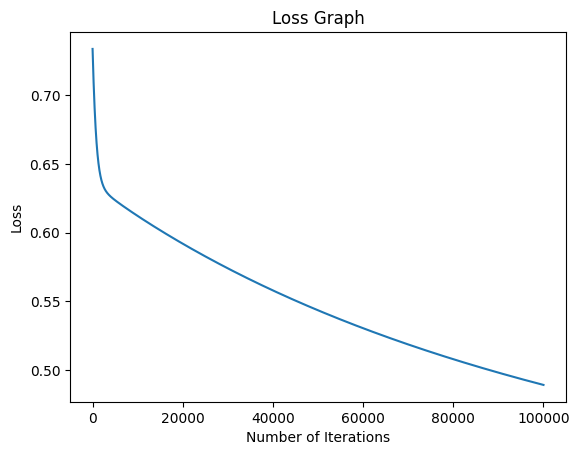

In [8]:
# Plot the loss graph
plt.plot(model.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()

**Hyper Parameter Optimization (setup-1)**

In [9]:
# Get predicted values
model2 = LogisticRegression(1e-2,110000)
model2.fit(X_train,Y_train)
gender_prediction2 = model2.predict(X_test)
print("prediction_values = {0}".format(gender_prediction2))

prediction_values = [0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0]


In [10]:
# Find the accuracy
accuracy2 = model2.accuracy_score(gender_prediction2, Y_test)
print("Accuracy Score = {0}".format(accuracy2))

Accuracy Score = 0.927536231884058


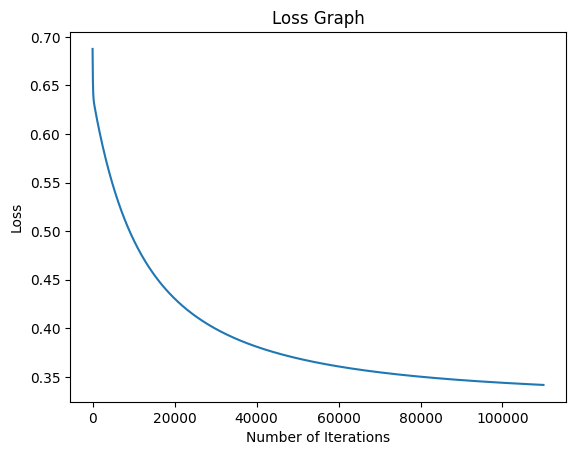

In [11]:
# Plot the loss graph
plt.plot(model2.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()

**Hyper Parameter Optimization (setup-2)**

In [12]:
# Get predicted values
model3 = LogisticRegression(1e-4,120000)
model3.fit(X_train,Y_train)
gender_prediction3 = model3.predict(X_test)
print("prediction_values = {0}".format(gender_prediction3))

prediction_values = [0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0]


In [13]:
# Find the accuracy
accuracy3 = model3.accuracy_score(gender_prediction3, Y_test)
print("Accuracy Score = {0}".format(accuracy3))

Accuracy Score = 0.7391304347826086


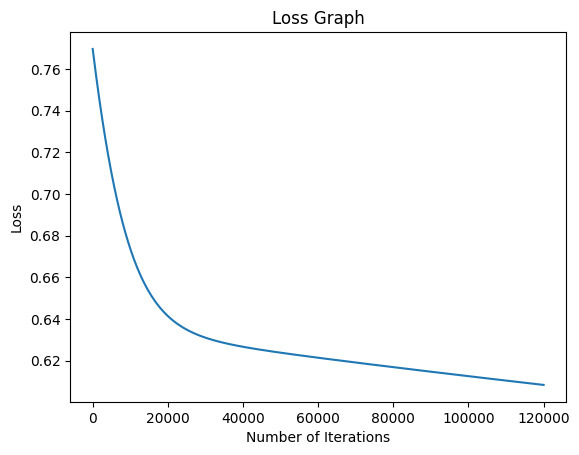

In [14]:
# Plot the loss graph
plt.plot(model3.loss)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()